## Loading basic packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Reading data

In [2]:
df = pd.read_csv("heart.csv")

## Initial data analysis

In [3]:
# Veryfying the type of data and if there is any missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Some basic statistical parameters of this data

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#Glimpse of the data

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Data names are not intuitive, so I will change it

change = {"cp" : "chest_pain","trestbps" : "bp_admission", "fbs" : "fasting_blood_sugar", "restecg" : "ecg", "thalach" : "maximum_hr", "exang" : "exercise_angina","oldpeak" : "st_depression","ca" : "n_vessels", "thal" : "thalassemia"}

df.rename(columns = change, inplace = True)

In [7]:
df.head()

,age,sex,chest_pain,bp_admission,chol,fasting_blood_sugar,ecg,maximum_hr,exercise_angina,st_depression,slope,n_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA

In [8]:
# Considering the two types of variables that we have here, and to ease the EDA

num_variables = ["age","bp_admission","chol","maximum_hr","st_depression"]
cat_variables =  ["sex","chest_pain","fasting_blood_sugar","ecg","exercise_angina","slope","n_vessels","thalassemia","target"]

### Univariate Analysis

#### Distribution (Numerical variables)

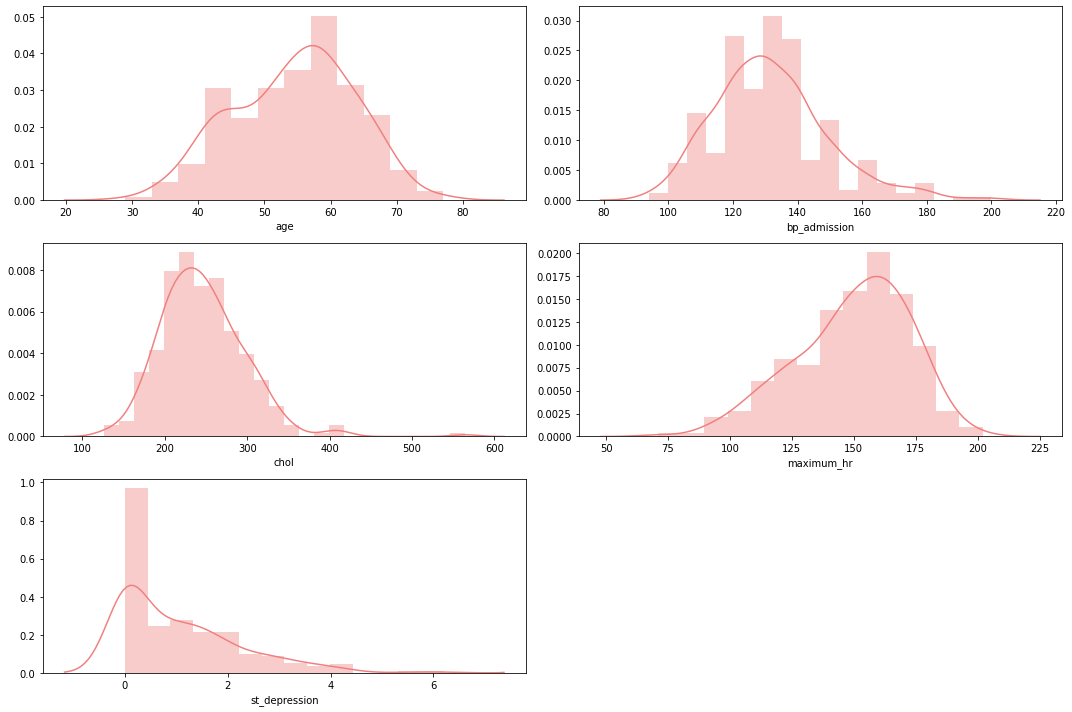

In [9]:
plt.figure(figsize = (15,10))
for i in range(len(num_variables)):
    plt.subplot(3,2,i+1)
    sns.distplot(df[num_variables].iloc[:,i], color = "lightcoral")
    plt.tight_layout()

#### Value range (Numerical variables)

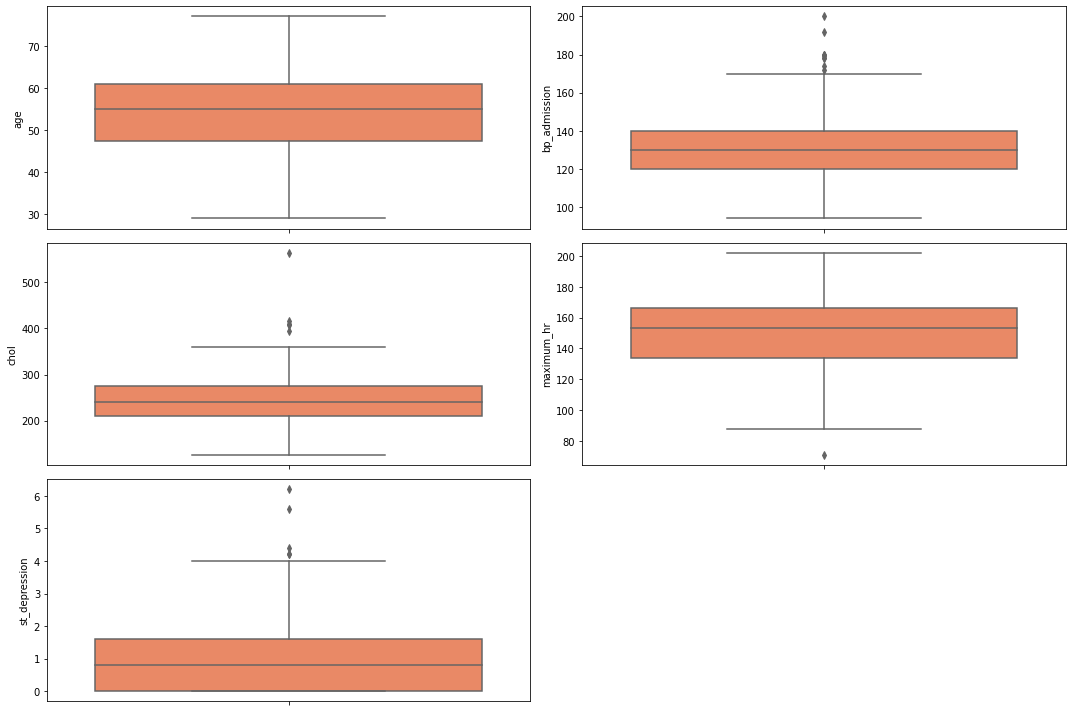

In [10]:
plt.figure(figsize = (15,10))
for i in range(len(num_variables)):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[num_variables].iloc[:,i], color = "coral", orient = "v")
    plt.tight_layout()

#### Value counts (Categorical variables)

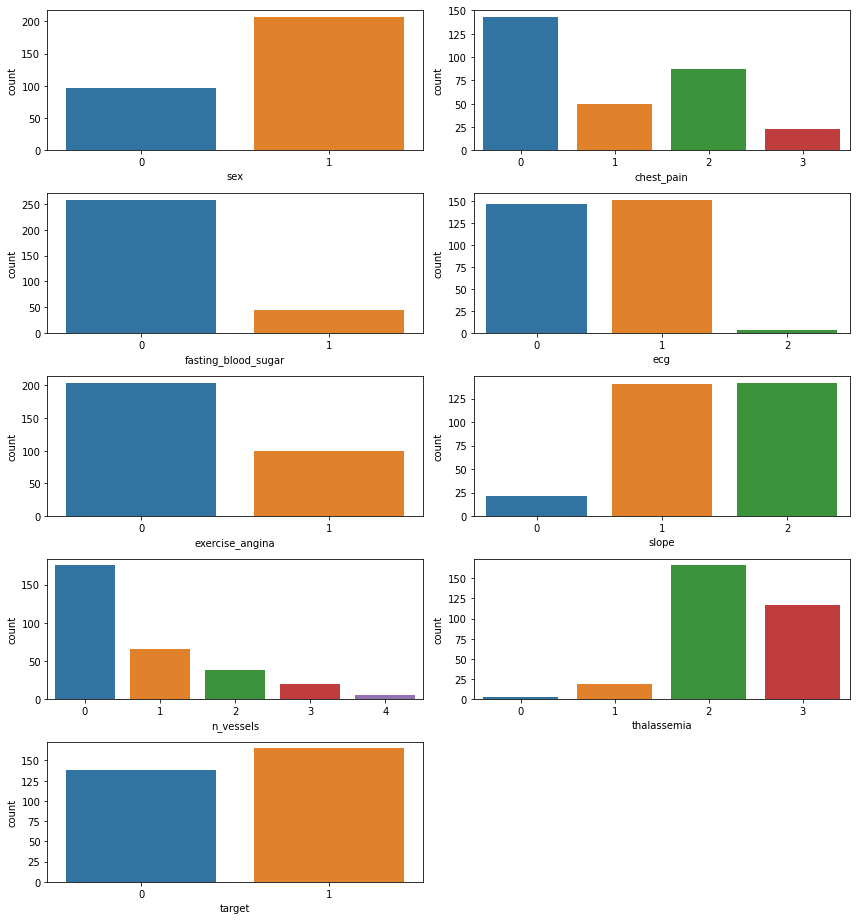

In [11]:
plt.figure(figsize = (12,15))

for i in range(len(cat_variables)):
    plt.subplot(6,2,i+1)
    sns.countplot(x = df[cat_variables].iloc[:,i], data = df)
    plt.tight_layout()

#### Correlations

(0.0, 14.0)

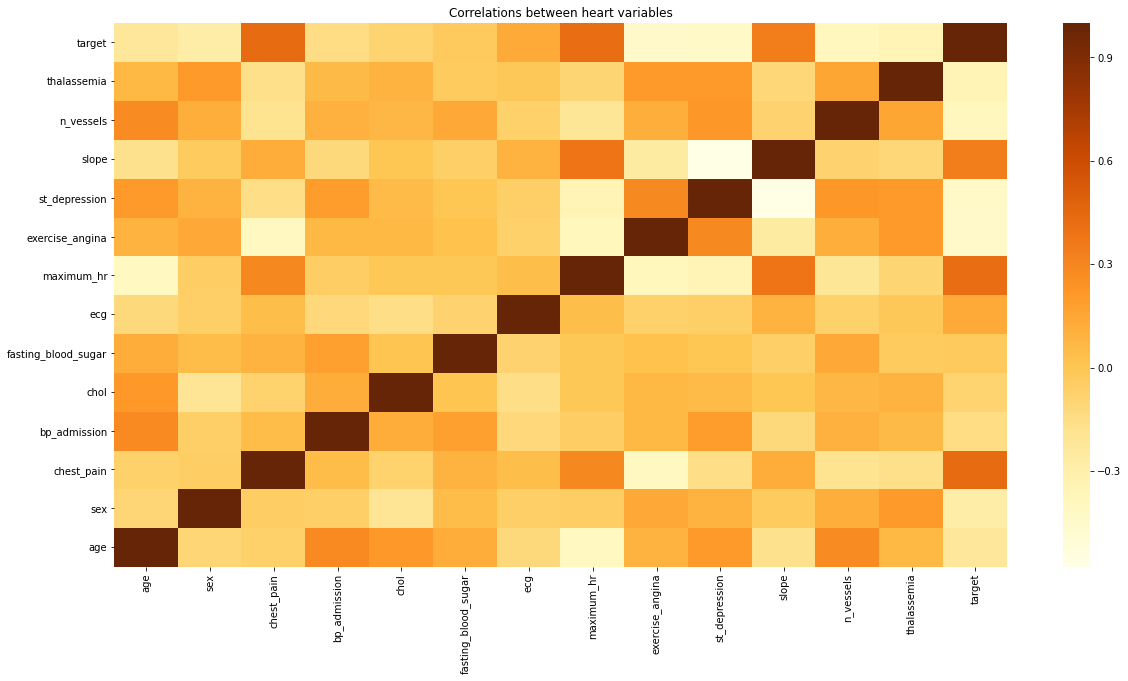

In [12]:
#Heatmap

cor = df.corr()

plt.figure(figsize = (20,10))
sns.heatmap(cor, cmap = "YlOrBr")
plt.title("Correlations between heart variables")
plt.ylim(0,14)


In [13]:
# Check correlation values for target

target_cor = cor["target"].sort_values(ascending = False)
target_cor

target                 1.000000
chest_pain             0.433798
maximum_hr             0.421741
slope                  0.345877
ecg                    0.137230
fasting_blood_sugar   -0.028046
chol                  -0.085239
bp_admission          -0.144931
age                   -0.225439
sex                   -0.280937
thalassemia           -0.344029
n_vessels             -0.391724
st_depression         -0.430696
exercise_angina       -0.436757
Name: target, dtype: float64

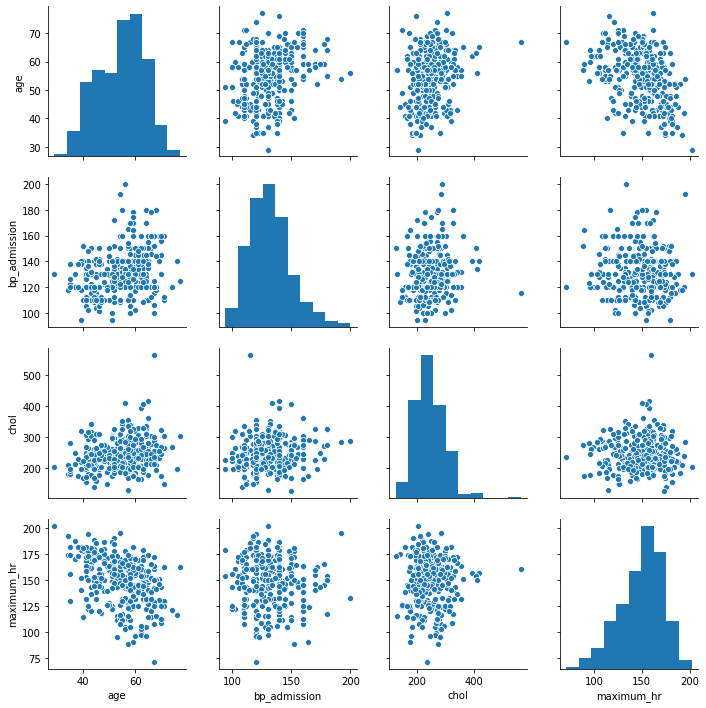

In [14]:
# Pairplot

num = df[["age","bp_admission","chol","maximum_hr"]]

sns.pairplot(num)

### Bivariate analysis

#### Sex vs Target

Text(0.5, 1.0, '% of heart disease in each sex')

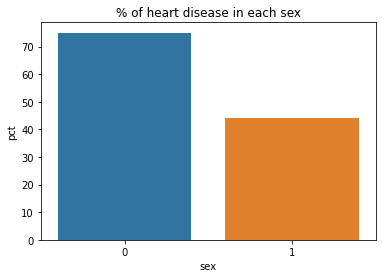

In [15]:
cat_variables =  ["sex","fasting_blood_sugar","exercise_angina"]

male =  df[df.sex == 1]
female =  df[df.sex == 0]

teste = df.groupby("sex")["target"].agg("sum").reset_index()

teste["pct"] = 0
for i in range(2):
    teste.pct[i] = teste.target[i] / len(df[df.sex == i]) * 100

sns.barplot(x = "sex", y = "pct", data = teste)
plt.title("% of heart disease in each sex")

#### Chest pain vs target

Text(0.5, 1.0, '% of heart disease for each type of chest pain')

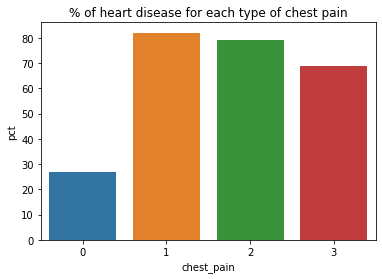

In [16]:
cat_variables =  ["sex","fasting_blood_sugar","exercise_angina"]

male =  df[df.sex == 1]
female =  df[df.sex == 0]

teste = df.groupby("chest_pain")["target"].agg("sum").reset_index()

teste["pct"] = 0
for i in range(4):
    teste.pct[i] = teste.target[i] / len(df[df.chest_pain == i]) * 100

sns.barplot(x = "chest_pain", y = "pct", data = teste)
plt.title("% of heart disease for each type of chest pain")

#### Fasting Blood Sugar vs Target


Text(0.5, 1.0, '% of heart disease vs Fasting Blood Sugar')

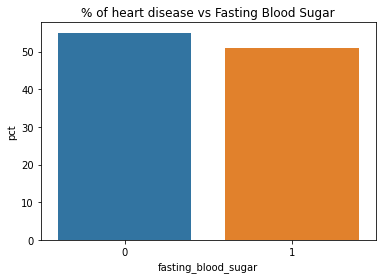

In [17]:
cat_variables =  ["sex","fasting_blood_sugar","exercise_angina"]

male =  df[df.sex == 1]
female =  df[df.sex == 0]

teste = df.groupby("fasting_blood_sugar")["target"].agg("sum").reset_index()

teste["pct"] = 0
for i in range(2):
    teste.pct[i] = teste.target[i] / len(df[df.fasting_blood_sugar == i]) * 100

sns.barplot(x = "fasting_blood_sugar", y = "pct", data = teste)
plt.title("% of heart disease vs Fasting Blood Sugar")

#### ECG vs target

Text(0.5, 1.0, '% of heart disease vs ECG r')

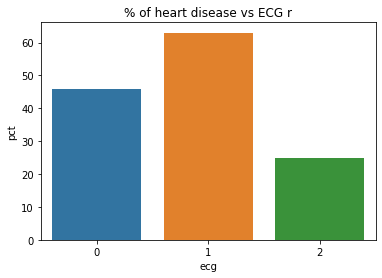

In [18]:
teste = df.groupby("ecg")["target"].agg("sum").reset_index()

teste["pct"] = 0
for i in range(3):
    teste.pct[i] = teste.target[i] / len(df[df.ecg == i]) * 100

sns.barplot(x = "ecg", y = "pct", data = teste)
plt.title("% of heart disease vs ECG r")

#### Exercise Angina vs Target

Text(0.5, 1.0, '% of heart disease vs Exercise Angina')

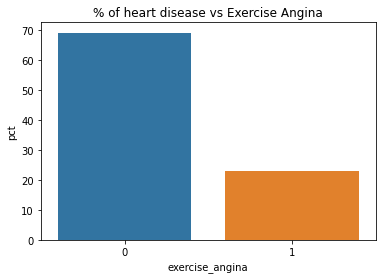

In [19]:
teste = df.groupby("exercise_angina")["target"].agg("sum").reset_index()

teste["pct"] = 0
for i in range(2):
    teste.pct[i] = teste.target[i] / len(df[df.exercise_angina == i]) * 100

sns.barplot(x = "exercise_angina", y = "pct", data = teste)
plt.title("% of heart disease vs Exercise Angina")

## Data treatment

### Outliers

In [20]:
# Since the number of samples is not very high, I wont remove outliers

### Feature Engineering

#### Age



In [21]:
# Lets analyze age 

df.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [22]:
# Creating age groups

young_adults = (df.age > 29) & (df.age <= 47)
adults = (df.age > 47) & (df.age <= 55)
older_adults = (df.age > 55) & (df.age <= 61)
elderly = (df.age > 61) & (df.age <= 77)

age_groups = [young_adults, adults, older_adults, elderly]

In [23]:
# Creating the new variable

df["age_group"] = 0

for i in range(len(age_groups)):
    df.loc[age_groups[i],"age_group"] = i

df["age_group"].value_counts()

2    80
1    76
0    76
3    71
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Heart disease in each age group')

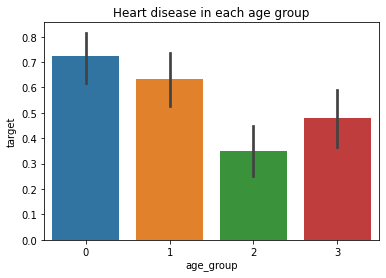

In [24]:
# Visualizing heart disease difference in each age group

sns.barplot(x = "age_group", y = "target", data = df)
plt.title("Heart disease in each age group")

#### Sex

In [25]:
# Whats the distribution by sex?

pct_male = len(df[df.sex == 1]) / len(df.sex) * 100
pct_female = len(df[df.sex == 0]) / len(df.sex) * 100

print("There are {:.2f}% males".format(pct_male))
print("There are {:.2f}% females".format(pct_female))



There are 68.32% males
There are 31.68% females


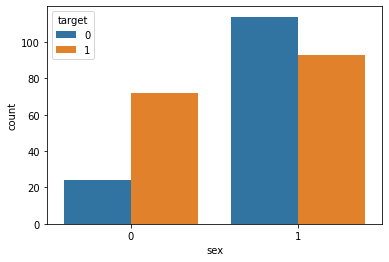

In [26]:
sns.countplot(x = "sex", hue = "target", data = df)

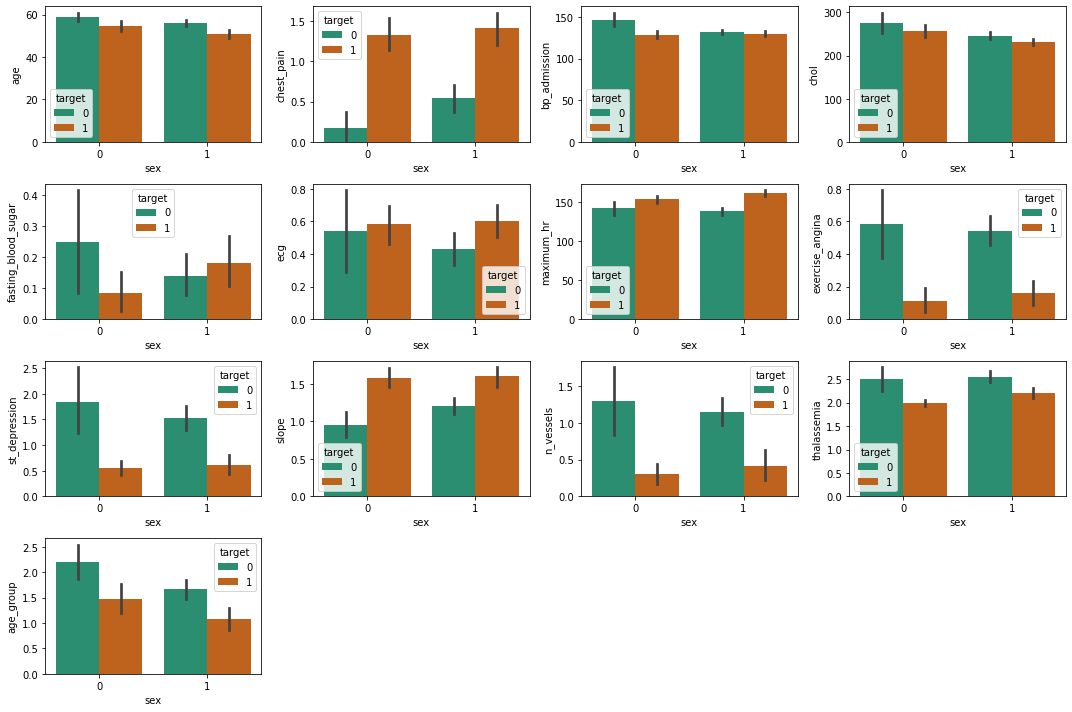

In [27]:
# Other analysis with sex

analysis = df.columns
analysis = analysis.drop("sex")
analysis = analysis.drop("target")

plt.figure(figsize = (15,10))
for i in range(len(analysis)):
    plt.subplot(4,4,i+1)
    sns.barplot(x = "sex", y = analysis[i], hue = "target", palette = "Dark2", data = df)

plt.tight_layout()

### Preparing Data

In [28]:
df.head()

,age,sex,chest_pain,bp_admission,chol,fasting_blood_sugar,ecg,maximum_hr,exercise_angina,st_depression,slope,n_vessels,thalassemia,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,3
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


## Applying ML Model

### Train/Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis = 1), df.target, test_size = 0.2, random_state = 10)

### Fitting and running the model

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
target_predict = rf.predict(X_test)

### Analyzing the fit of the model

#### Confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix

confusion_m = confusion_matrix(y_test, target_predict)
confusion = pd.DataFrame(confusion_m, columns = ["HD True","HD False"], index = ["Predict HD","Predict NO HD"])
confusion

,HD True,HD False
Predict HD,28,7
Predict NO HD,6,20


In [33]:
sensitivity = confusion_m[0,0]/(confusion_m[0,0]+confusion_m[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_m[1,1]/(confusion_m[1,1]+confusion_m[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8235294117647058
Specificity :  0.7407407407407407


#### Accuracy score

In [34]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, target_predict)
print("The accuracy is {}".format(acc))

The accuracy is 0.7868852459016393


#### Feature Importances

In [35]:
f_importances = pd.DataFrame({"Feature" : X_train.columns, "Weight" : rf.feature_importances_})
f_importances.sort_values("Weight", ascending = False)


,Feature,Weight
11,n_vessels,0.196701
2,chest_pain,0.117647
4,chol,0.091489
8,exercise_angina,0.089424
0,age,0.084727
7,maximum_hr,0.082637
9,st_depression,0.075226
3,bp_admission,0.065476
10,slope,0.061255
12,thalassemia,0.056045


#### ROC AUC Score

In [36]:
from sklearn.metrics import  roc_auc_score
y_score = rf.predict_proba(X_train)
y_score = y_score[:,1]

roc_score  = roc_auc_score(y_train,y_score)
roc_score


0.9996856883425298

In [37]:
# After this I experimented with various otter variabeles included, all the experiments with worst sensibility and specificity. Thus, I will use all the avriables, as in this first iteration.


### Hyperparameter Tuning

#### Current parameters

In [38]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Randomized Search Grid

In [39]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
max_features = ['sqrt', 'auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 100, num = 10)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(2, 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 50, num = 10)]
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['sqrt', 'auto', 'log2'], 'max_depth': [5, 15, 26, 36, 47, 57, 68, 78, 89, 100, None], 'min_samples_split': [2, 7, 12, 18, 23, 28, 34, 39, 44, 50], 'min_samples_leaf': [2, 7, 12, 18, 23, 28, 34, 39, 44, 50], 'bootstrap': [True, False]}


In [40]:
rf_test = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator = rf_test, param_distributions = random_grid, cv = 10, n_iter = 100, n_jobs = -1, verbose = 2, random_state = 1)
random_search.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [41]:
random_search.best_params_

{'n_estimators': 235,
 'min_samples_split': 28,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 57,
 'bootstrap': False}

#### GridSearch

In [42]:
from sklearn.model_selection import GridSearchCV

n_estimators = [50,100,150,200]
max_features = ['sqrt',"auto"]
max_depth = [10,30,50,70]
min_samples_split = [5,10,15,20]
min_samples_leaf = [10,20,30]
bootstrap = [True]
# Create the random grid
best_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(best_grid)

{'n_estimators': [50, 100, 150, 200], 'max_features': ['sqrt', 'auto'], 'max_depth': [10, 30, 50, 70], 'min_samples_split': [5, 10, 15, 20], 'min_samples_leaf': [10, 20, 30], 'bootstrap': [True]}


In [43]:
rf2 = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf2, param_grid = best_grid, n_jobs = -1, cv = 10, verbose = 2 )
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 384 candidates, totalling 3840 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min


KeyboardInterrupt: 

### Refitting model with new parameters

In [40]:
rf3 = RandomForestClassifier(n_estimators = 50, min_samples_split = 20, min_samples_leaf = 20, max_features = "auto", max_depth = 30, bootstrap = True)

In [41]:
rf3.fit(X_train,y_train)
final_pred = rf3.predict(X_test)

In [44]:
confusion_m = confusion_matrix(y_test, final_pred)
confusion = pd.DataFrame(confusion_m, columns = ["HD True","HD False"], index = ["Predict HD","Predict NO HD"])
confusion

,HD True,HD False
Predict HD,26,9
Predict NO HD,5,21


In [129]:
### Apparently There is no benefict in Hyperparameter tuning!

###  Visualizing Model

In [45]:
estimator = rf.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [46]:
from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])



0

In [2]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


FileNotFoundError: [WinError 2] O sistema não conseguiu localizar o ficheiro especificado